In [2]:
from nltk.corpus import brown

sentences_brown = brown.sents()

print sentences_brown[0]

[u'The', u'Fulton', u'County', u'Grand', u'Jury', u'said', u'Friday', u'an', u'investigation', u'of', u"Atlanta's", u'recent', u'primary', u'election', u'produced', u'``', u'no', u'evidence', u"''", u'that', u'any', u'irregularities', u'took', u'place', u'.']


In [3]:
from gensim.models.word2vec import Word2Vec

model_brown = Word2Vec(sentences_brown, size=100, window=10, min_count=50, workers=10)

In [6]:
print model_brown['power']

[ 0.66176057  0.50127912 -0.66466939  0.48793441 -0.39839309 -0.28991649
  0.15877441 -0.02053073  0.617558   -0.10716531  0.03245898 -0.46031487
  0.27945322 -0.51232356  0.62292975  0.06283063 -0.29832795 -0.20066886
 -0.12403066 -0.43371335 -0.88122988  0.66928965  0.05252532  0.48676702
 -0.33941802  0.13867646 -0.15291153  0.46484202  0.51802593 -0.38200232
  0.06916378  0.14888579  0.52792418  0.45266578  0.17979738  0.32131466
  0.011549    0.33633882  0.31419942 -0.19919576  0.04361802  0.76327711
 -0.1914192  -0.28809077 -0.178481   -0.38528824  0.01866402 -0.2487682
  0.06358103  0.23885396 -0.26311958  0.19022033  0.03908747 -0.09099166
 -0.00864933  0.490468   -0.60296494 -0.45265597 -0.09847628 -0.08699473
  0.05371901 -0.65111369 -0.26730922 -0.22331718 -0.18060876 -0.60249215
 -0.51751059 -0.17550713  0.06451754  0.28770939  0.13177054 -0.1301105
 -0.77255929  0.15106547 -0.46153557  0.21588486  0.03321286 -0.02949243
 -0.13408148 -0.10252306 -0.14523181 -0.14673352 -0.0

/Users/jiho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [8]:
print model_brown['man']

[-0.77865952  0.38610595 -0.51216388  0.71730381 -0.25153944  0.85955548
 -0.29597333 -0.61970925 -0.06187771  1.20972216 -0.39060768  1.37673962
 -1.65008783  0.29454684  0.61967307  0.61278939 -0.47953102  0.30806193
 -0.11276204 -0.38714075  0.2816321  -0.5716902   0.05435604 -0.08918796
  0.32264543  1.23408413  1.39446163 -0.51355135  0.04382174 -0.76615709
  0.44034052 -0.57323664  0.55451888  0.56194568 -0.75117081  0.17505886
 -0.20382699  0.34728283 -0.50756657 -0.25649637 -1.12085497  0.90360105
  0.17752424  1.03427756 -1.03156722 -0.40784058 -0.71797454  0.92327708
 -0.42365381 -1.03730893  2.07992506 -0.70743483 -0.77698296 -0.44863617
 -1.4548291   0.22222424  0.19809969 -0.54142022  0.31761441  0.34267437
 -0.46292222 -0.57739317  2.64821386 -0.67914879  0.72028238  0.26020464
 -0.20333408 -1.15408349  0.03980006  1.21756816 -0.5240944  -0.2790947
 -0.59950972  0.48653305 -0.22722365  1.16960299 -0.03984007 -0.49395183
 -0.24226922 -0.31912786  0.10102469  0.83498126  0.

/Users/jiho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [9]:
from sklearn.manifold import TSNE

In [10]:
X = model_brown[model_brown.wv.vocab]

/Users/jiho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [11]:
X_tsne = TSNE(n_components=2).fit_transform(X)

In [12]:
import matplotlib.pyplot as plt

In [13]:
plt.figure(figsize=(10,10), facecolor='w')

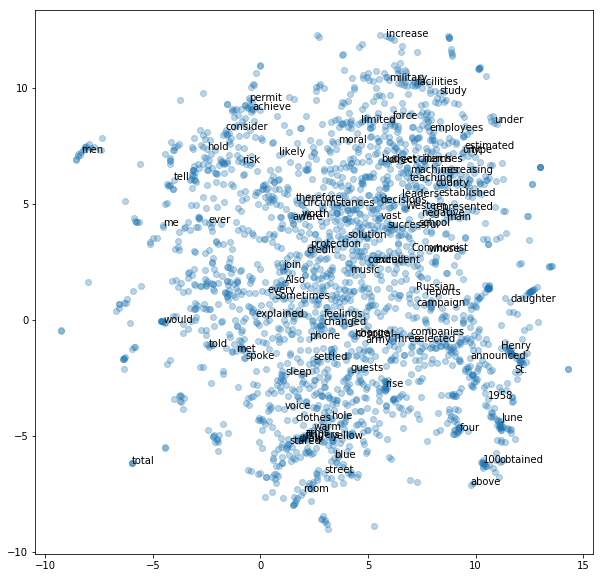

In [14]:
plt.scatter(X_tsne[:,0], X_tsne[:, 1], alpha=.3)

for idx, vec in enumerate(X_tsne):
    x, y = vec[0], vec[1]
    text_word = model_brown.wv.vocab.keys()[idx]
    
    if idx < 100:
        plt.annotate(text_word, xy=(x,y))

plt.show()

In [16]:
for word, score in model_brown.most_similar(positive=['man', 'favor'], negative=['woman']):
    print word, score

freedom 0.790839552879
regard 0.751829624176
moral 0.74002289772
faith 0.735139548779
attitude 0.723022222519
truth 0.713119149208
create 0.711558818817
sense 0.710637331009
deal 0.709923624992
justice 0.705617129803


/Users/jiho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [18]:
for word, score in model_brown.most_similar(positive=['man', 'love'], negative=['woman']):
    print word, score

God 0.832042038441
understand 0.739138484001
Christ 0.734496593475
really 0.711309313774
simply 0.704747676849
question 0.697880148888
feel 0.691501319408
know 0.674566268921
thing 0.660716533661
questions 0.658353567123


/Users/jiho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [19]:
for word, score in model_brown.most_similar(positive=['woman', 'favor'], negative=['man']):
    print word, score

fashion 0.800231099129
master 0.795618414879
sexual 0.789617300034
beautiful 0.785571157932
confidence 0.777002096176
beauty 0.772037267685
feelings 0.769224226475
alive 0.766931951046
background 0.766449213028
loved 0.757995903492


/Users/jiho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
